In [ ]:
# ===========================
# Install Qiskit, Aer and pylatexenc
# ===========================
!pip install qiskit --quiet
!pip install qiskit-aer --quiet

In [1]:
# ==========================================
# HADAMARD GATE VISUALIZATION & ANALYSIS
# Compatible with Qiskit 2.x
# ==========================================

# -------------------------
# 1️⃣ Imports
# -------------------------
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_histogram
from qiskit_aer import AerSimulator
import numpy as np

In [2]:

# -------------------------
# 2️⃣ Helper Function
# -------------------------
def visualize_hadamard(init_state_vector, label):
    """
    Applies Hadamard to a single-qubit initial state and visualizes results.
    """
    # Build circuit for measurement
    qc = QuantumCircuit(1, 1)
    qc.initialize(init_state_vector, 0)
    qc.h(0)
    qc.measure(0, 0)

    # Statevector before measurement
    qc_state = QuantumCircuit(1)
    qc_state.initialize(init_state_vector, 0)
    qc_state.h(0)
    state_after = Statevector.from_instruction(qc_state)

    print(f"--- {label} ---")
    print("After Hadamard, statevector:", state_after.data)

    # Visualizations
    display(plot_bloch_multivector(state_after, title=f"Bloch Sphere: H on {label}"))
    display(plot_state_city(state_after, title=f"State City: H on {label}"))

    # Simulation with AerSimulator
    sim = AerSimulator()
    qc_t = transpile(qc, sim)
    result = sim.run(qc_t, shots=1024).result()
    counts = result.get_counts()
    display(plot_histogram(counts, title=f"Measurement Histogram: H on {label}"))
    print("\n")

--- |0> ---
After Hadamard, statevector: [0.70710678+0.j 0.70710678+0.j]


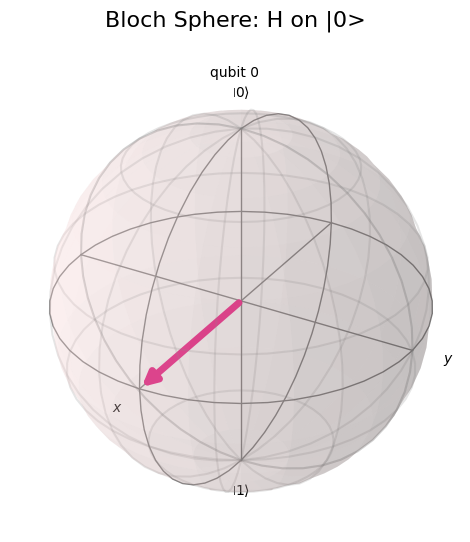

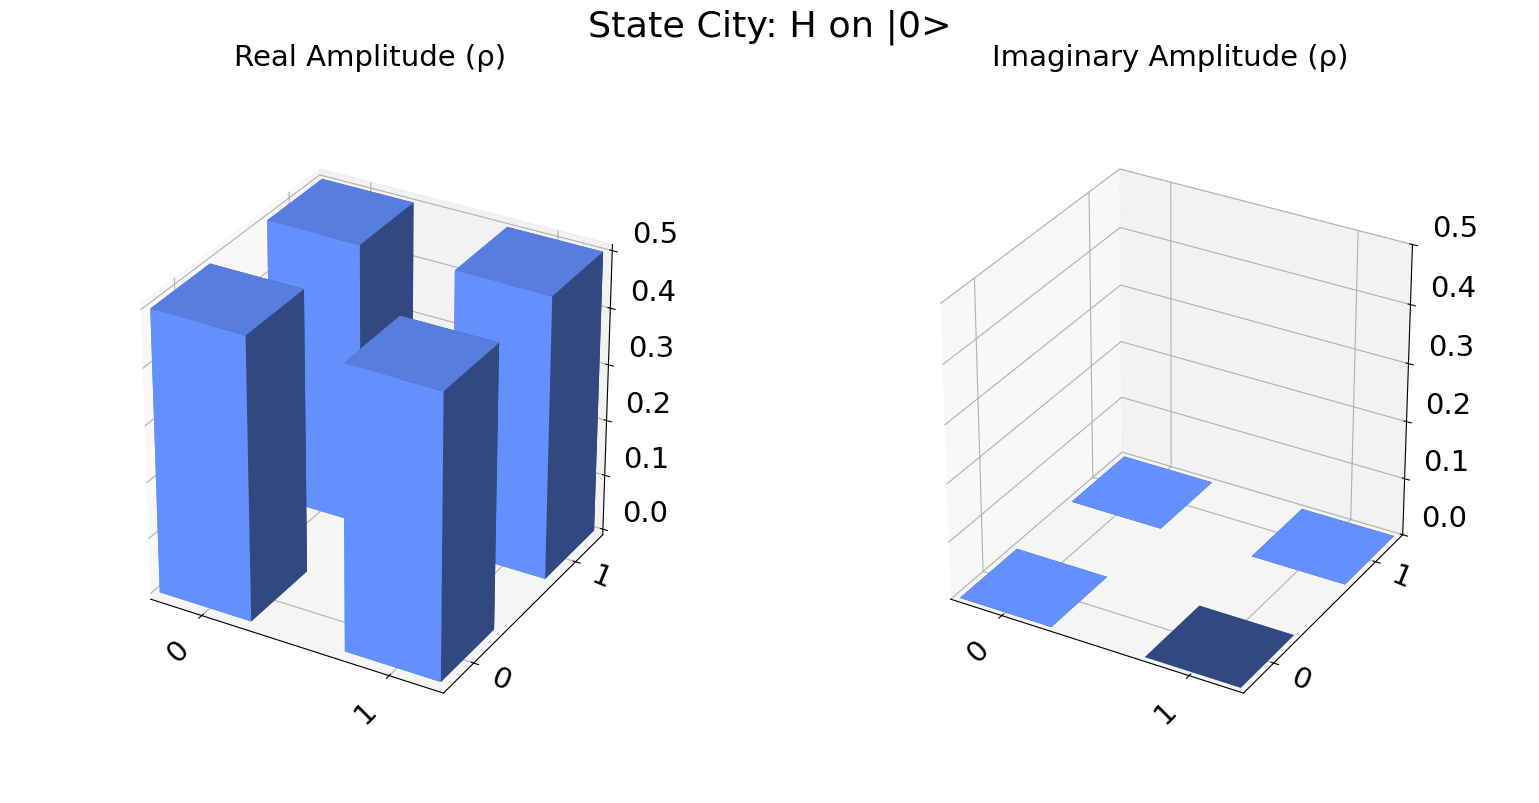

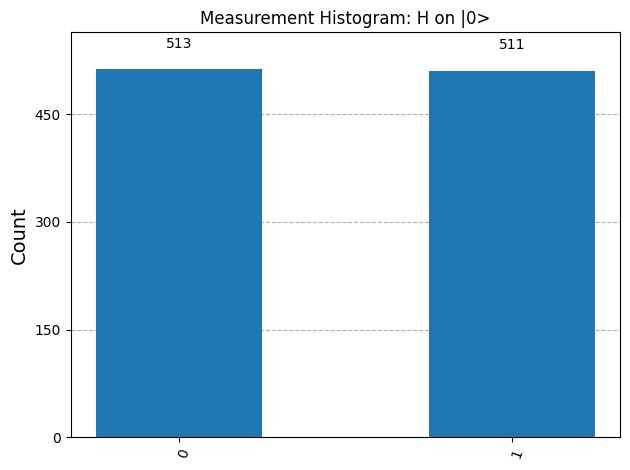



--- |1> ---
After Hadamard, statevector: [ 0.70710678+0.j -0.70710678+0.j]


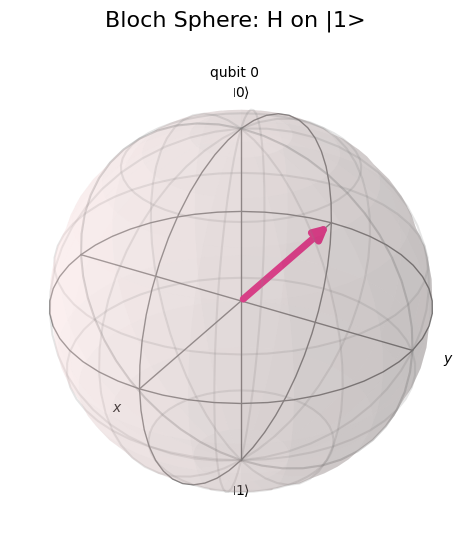

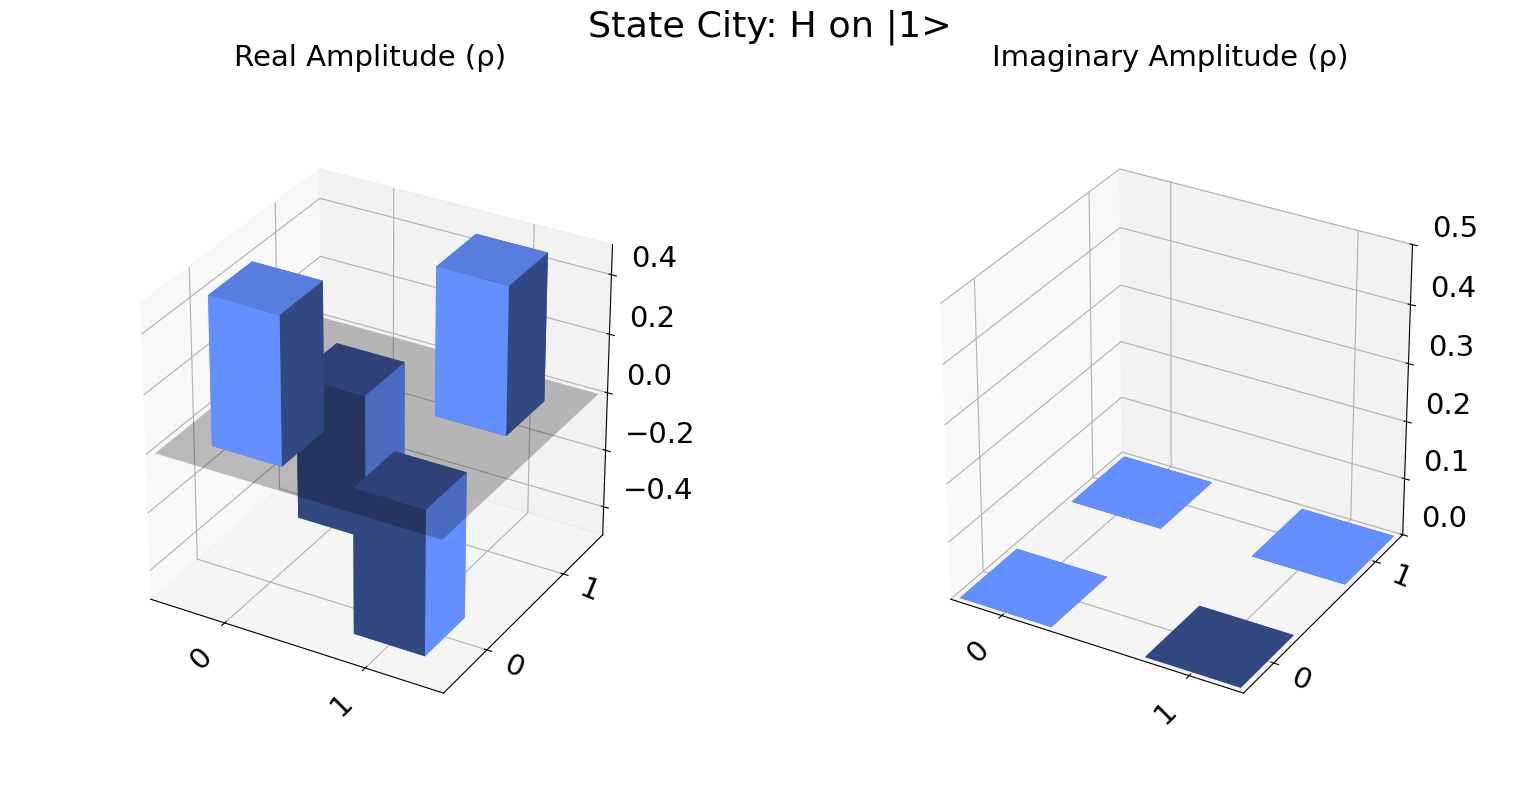

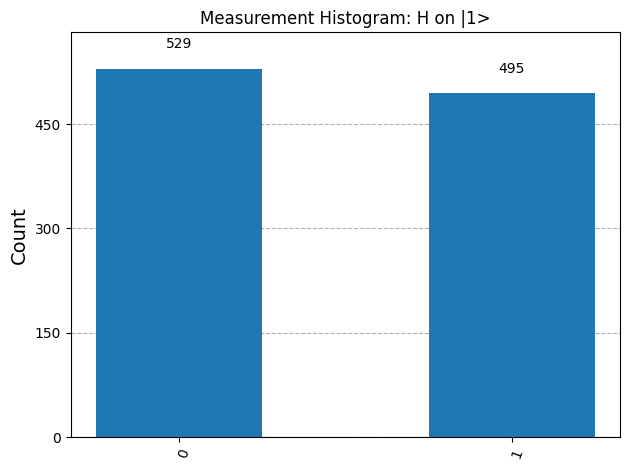



--- |+> ---
After Hadamard, statevector: [1.+0.j 0.+0.j]


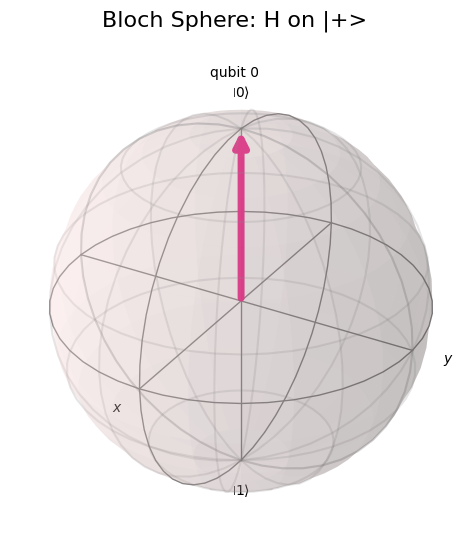

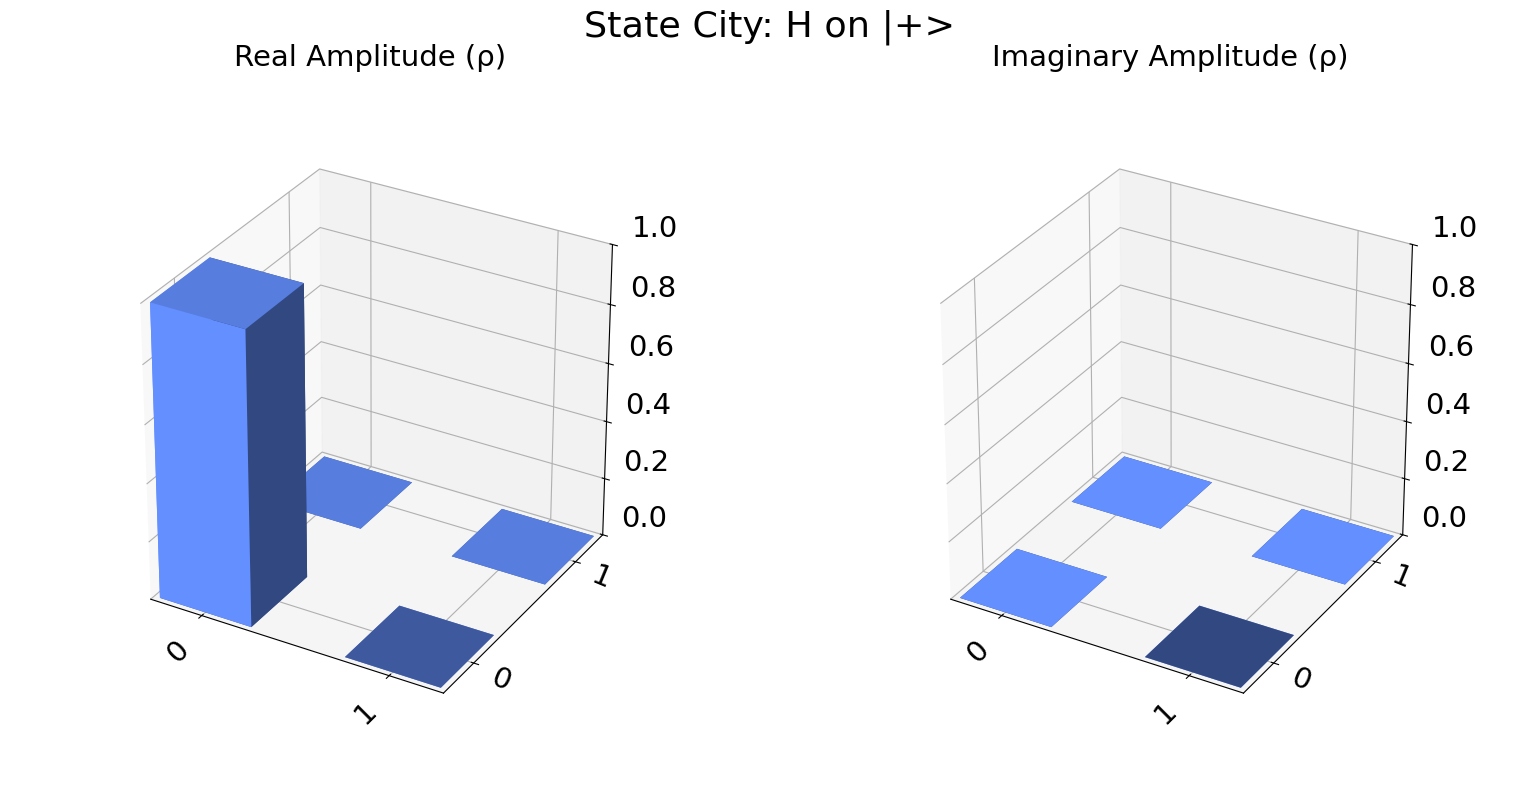

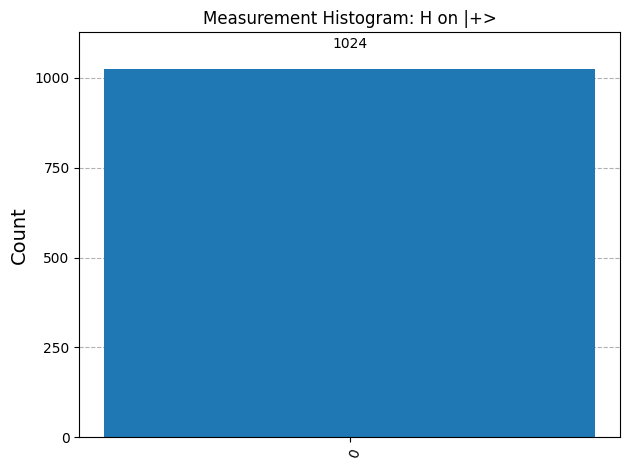



--- |-> ---
After Hadamard, statevector: [0.+0.j 1.+0.j]


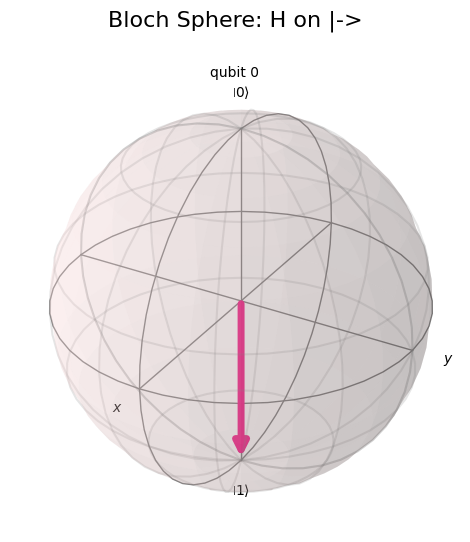

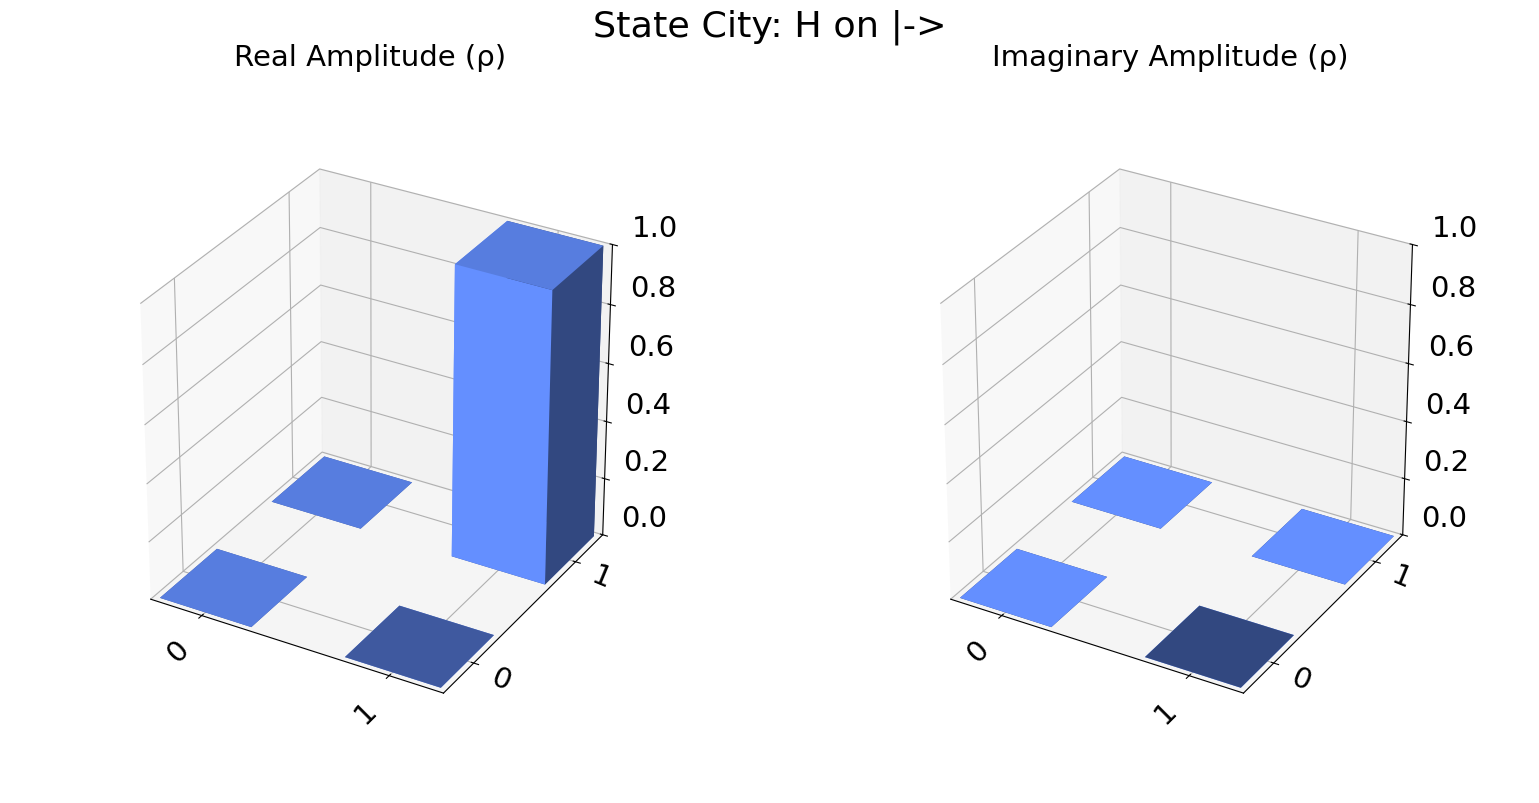

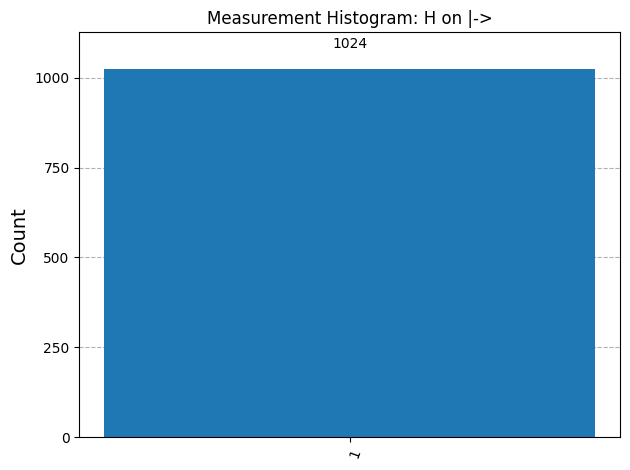

In [3]:
# -------------------------
# 3️⃣ Single Qubit Examples
# -------------------------

# |0>
visualize_hadamard(np.array([1, 0]), "|0>")

# |1>
visualize_hadamard(np.array([0, 1]), "|1>")

# |+> = (|0> + |1>)/√2
visualize_hadamard(np.array([1/np.sqrt(2), 1/np.sqrt(2)]), "|+>")

# |-> = (|0> - |1>)/√2
visualize_hadamard(np.array([1/np.sqrt(2), -1/np.sqrt(2)]), "|->")


--- Two-Qubit H⊗H on |00> ---
Statevector: [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


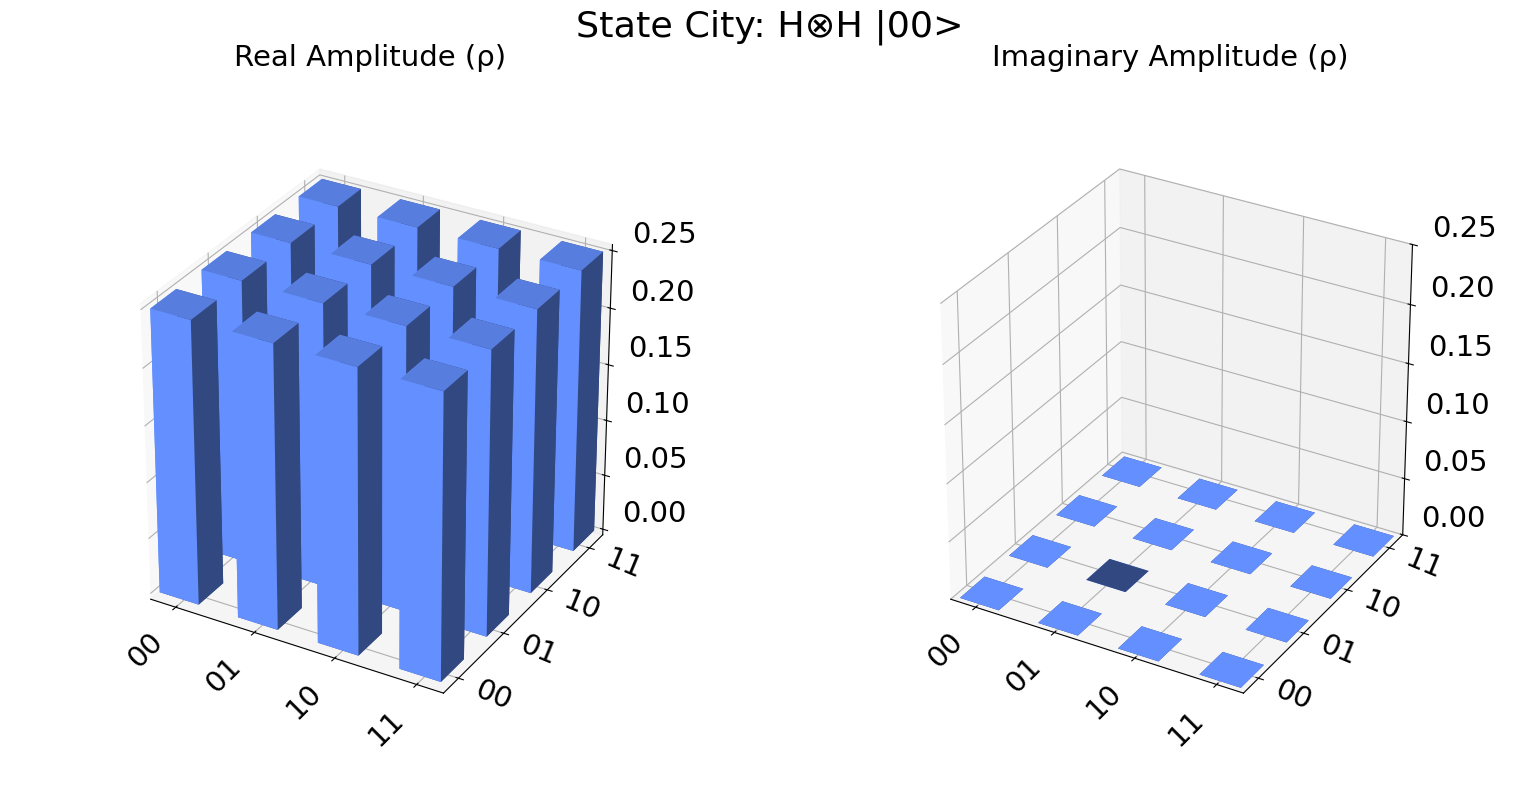

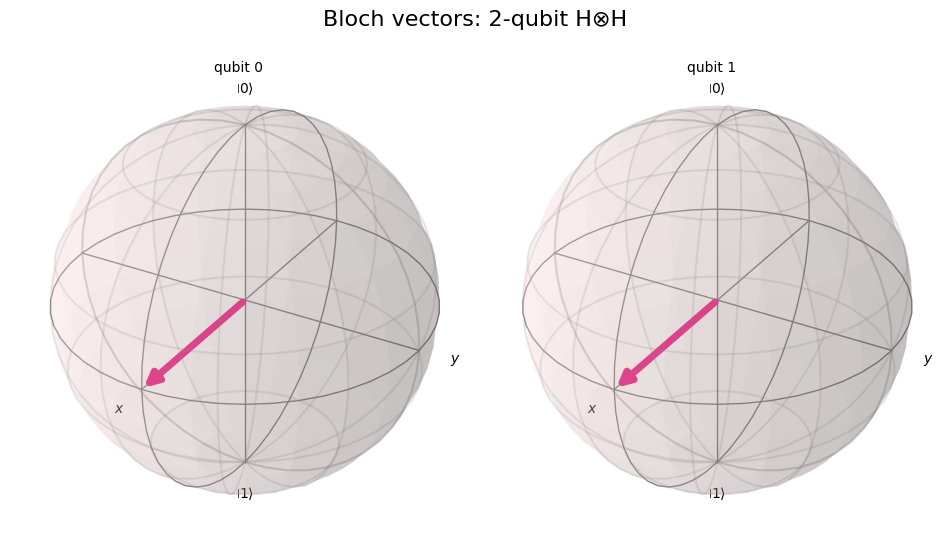

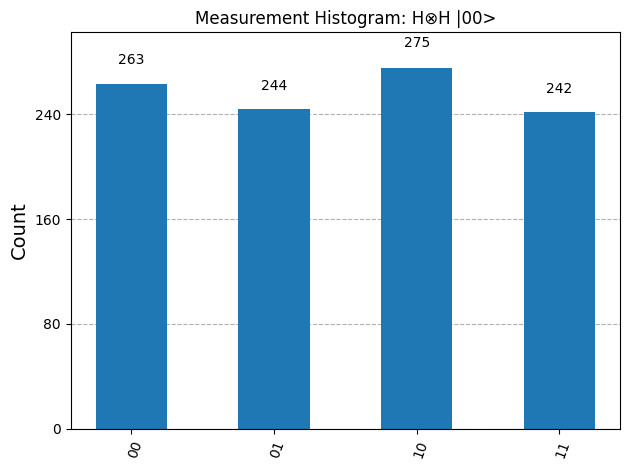


Analytical: equal probability for |00>, |01>, |10>, |11>.



In [4]:

# -------------------------
# 4️⃣ Two Qubit System: H⊗H
# -------------------------
qc2 = QuantumCircuit(2, 2)
qc2.h([0, 1])
qc2.measure([0, 1], [0, 1])

# Statevector before measurement
qc2_state = QuantumCircuit(2)
qc2_state.h([0, 1])
state2 = Statevector.from_instruction(qc2_state)

print("--- Two-Qubit H⊗H on |00> ---")
print("Statevector:", state2.data)

display(plot_state_city(state2, title="State City: H⊗H |00>"))
display(plot_bloch_multivector(state2, title="Bloch vectors: 2-qubit H⊗H"))

# Simulation
sim = AerSimulator()
qc2_t = transpile(qc2, sim)
result2 = sim.run(qc2_t, shots=1024).result()
counts2 = result2.get_counts()
display(plot_histogram(counts2, title="Measurement Histogram: H⊗H |00>"))
print("\nAnalytical: equal probability for |00>, |01>, |10>, |11>.\n")


--- Bell State (|00> + |11>)/√2 ---
Statevector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


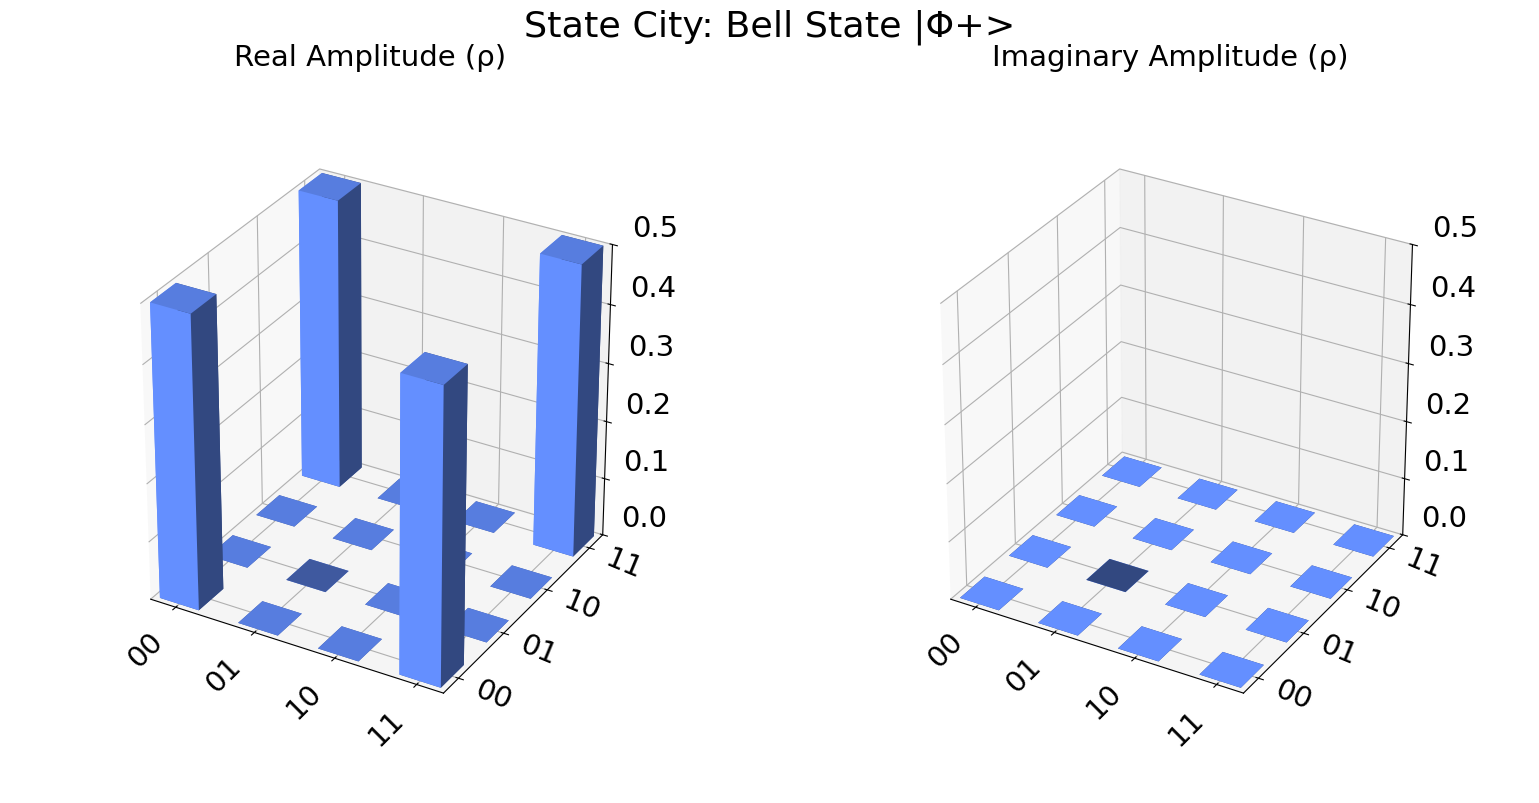

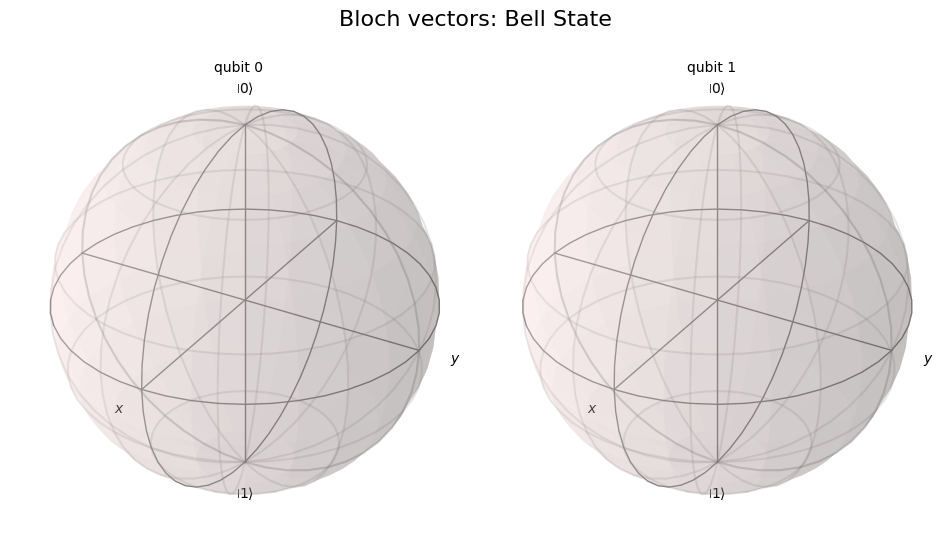

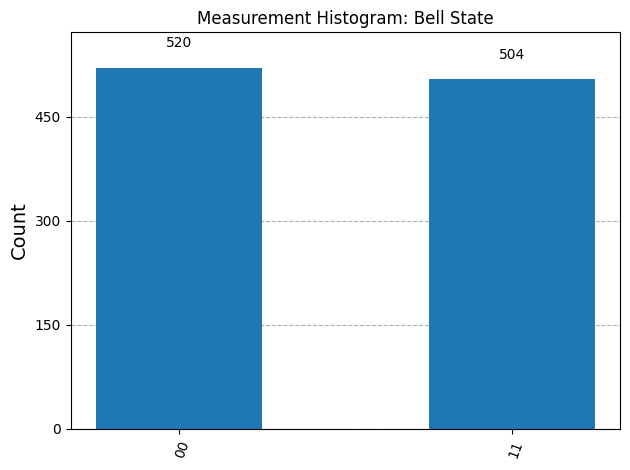


Analytical: outcomes |00> and |11> only, perfectly correlated.



In [5]:
# -------------------------
# 5️⃣ Entangled State (Bell Pair): H + CNOT
# -------------------------
qc_ent = QuantumCircuit(2, 2)
qc_ent.h(0)    # Hadamard on first qubit
qc_ent.cx(0, 1)  # CNOT: entangle qubits
qc_ent.measure([0, 1], [0, 1])

# Statevector before measurement
qc_ent_state = QuantumCircuit(2)
qc_ent_state.h(0)
qc_ent_state.cx(0, 1)
state_ent = Statevector.from_instruction(qc_ent_state)

print("--- Bell State (|00> + |11>)/√2 ---")
print("Statevector:", state_ent.data)

display(plot_state_city(state_ent, title="State City: Bell State |Φ+>"))
display(plot_bloch_multivector(state_ent, title="Bloch vectors: Bell State"))

# Simulation
qc_ent_t = transpile(qc_ent, sim)
result_ent = sim.run(qc_ent_t, shots=1024).result()
counts_ent = result_ent.get_counts()
display(plot_histogram(counts_ent, title="Measurement Histogram: Bell State"))
print("\nAnalytical: outcomes |00> and |11> only, perfectly correlated.\n")


Probabilities: {np.str_('000'): np.float64(0.12499999999999994), np.str_('001'): np.float64(0.12499999999999994), np.str_('010'): np.float64(0.12499999999999994), np.str_('011'): np.float64(0.12499999999999994), np.str_('100'): np.float64(0.12499999999999994), np.str_('101'): np.float64(0.12499999999999994), np.str_('110'): np.float64(0.12499999999999994), np.str_('111'): np.float64(0.12499999999999994)}


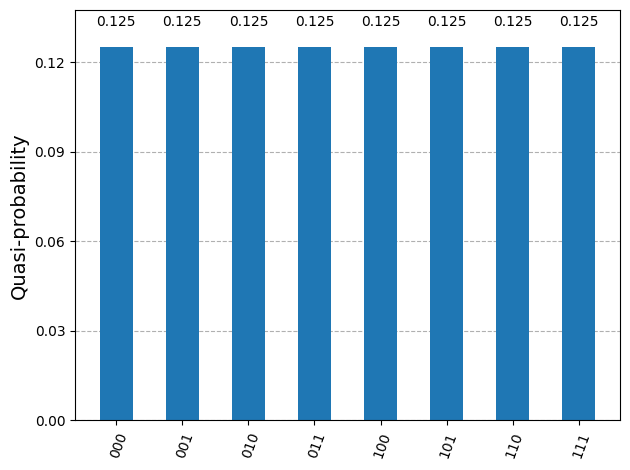

In [6]:
"""
Task: Create a 3-qubit system with H⊗H⊗H and analyze measurement probabilities.
"""

qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.h(2)

# Get the statevector
sv = Statevector.from_instruction(qc)

# Calculate probabilities
probs = sv.probabilities_dict()
print("Probabilities:", probs)

# Visualize
display(plot_histogram(probs))

- Each qubit is in a perfect 50/50 superposition.

- When measured, all 8 possible combinations (000, 001, 010, 011, 100, 101, 110, 111) are equally likely.

- The probability for each one is (1/sqrt(2))³ = 1/8 = 12.5%. The histogram plot will show 8 bars, all at the same height.

Statevector: Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


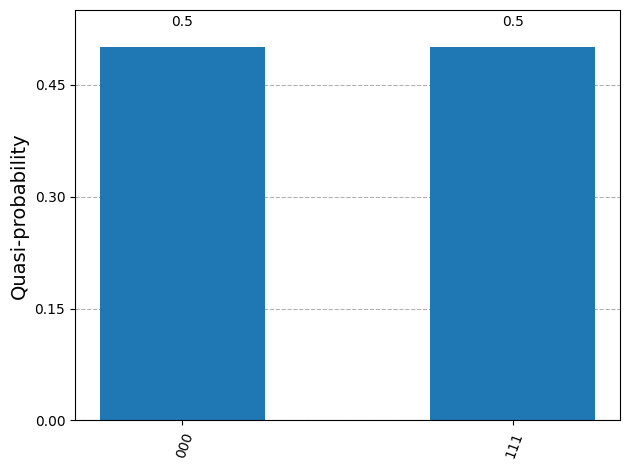

In [7]:
"""
Task: Apply H + CX + CX on 3 qubits and analyze correlations.
"""

qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)

# Get the statevector
sv = Statevector.from_instruction(qc)
print("Statevector:", sv)

# Calculate probabilities
probs = sv.probabilities_dict()
display(plot_histogram(probs))

- The statevector is [0.707, 0, 0, 0, 0, 0, 0, 0.707].

- This means the system is in a superposition of only two states: |000> and |111>.

- Correlations: When measured, we will only get the result "000" (50% chance) or "111" (50% chance). No other combination can be obtained.

In [8]:
"""
Task: Apply H twice on |1> and verify the original state.
"""

qc = QuantumCircuit(1)

# Start in state |1>
qc.initialize([0, 1], 0)

# Apply H gate
qc.h(0)
# State is now |->

# Apply H gate again
qc.h(0)
# State should be back to |1>

# Check the statevector
sv = Statevector.from_instruction(qc)
print("Final Statevector:", sv.data)

Final Statevector: [0.+0.j 1.+0.j]


- The output will be [0.+0.j, 1.+0.j], which is the statevector for |1>. This proves we are back where we started.

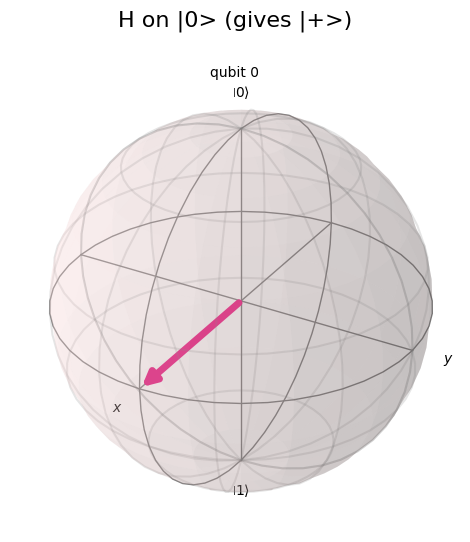

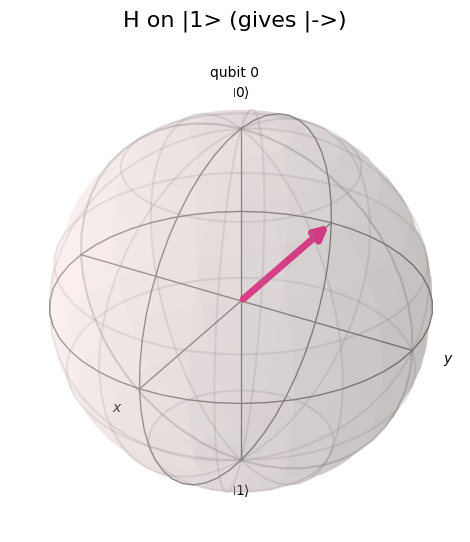

In [9]:
"""
Task: Use Bloch sphere plots to observe qubit rotations after Hadamard.
"""

# 1. H on |0>
qc_0 = QuantumCircuit(1)
qc_0.initialize([1, 0], 0) # Start at |0>
qc_0.h(0)
sv_0 = Statevector.from_instruction(qc_0)
display(plot_bloch_multivector(sv_0, title="H on |0> (gives |+>)"))

# 2. H on |1>
qc_1 = QuantumCircuit(1)
qc_1.initialize([0, 1], 0) # Start at |1>
qc_1.h(0)
sv_1 = Statevector.from_instruction(qc_1)
display(plot_bloch_multivector(sv_1, title="H on |1> (gives |->)"))

- The first plot, "H on |0>", will show the vector pointing from the center to the +X axis. The qubit started at the North Pole (|0>) and was rotated 90 degrees around the Y-axis to point directly at you. This is the |+> state.

- The second plot, "H on |1>", will show the vector pointing to the -X axis. The qubit started at the South Pole (|1>) and was rotated to point directly away from you. This is the |-> state.